# QTM 151 - Quiz 2 

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [1]:
# Write your answer here
print("Jenny Jiang")

Jenny Jiang


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


In [2]:
# Write your answer here:
print("I will abide by Emory's code of conduct")


I will abide by Emory's code of conduct


<font size = "5">

Import the libraries "numpy", "matplotlib.pyplot", <br>
"pandas", "statsmodels.api" and "statsmodels.formula.api"


In [16]:
# Write your answer here
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf

<font size = "5">

Read the dataset "data_quiz/fifa23_players_basic.csv"

- It's a dataset on professional soccer players
- Rows correspond to players (18,539)
- Columns contain attributes of players (32)
- Try to view the dataset before starting <br>
to get a sense of its content

In [5]:
# Write your own code

data = pd.read_csv("data_quiz/fifa23_players_basic.csv")
data


,Unnamed: 0,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate
0,0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low
1,1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium
2,2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium
3,3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High
4,4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,174,68,1287,274,Sligo Rovers,500,193000,RES,2022,20,2018,-,Right,3,2,1,-,-,-,-,Medium,Medium
18535,18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,175,60,1289,267,Guangzhou FC,500,158000,SUB,2023,30,2021,-,Right,3,2,1,-,-,-,-,Medium,Medium
18536,18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,170,65,1333,277,Derry City,500,332000,SUB,2023,38,2022,-,Right,3,2,1,-,-,-,-,High,Medium
18537,18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,178,65,1113,226,Derry City,500,218000,SUB,2024,37,2022,-,Right,3,2,1,-,-,-,-,Medium,Medium


<font size = "5">

(a) Use queries + global variables

<font size = "3">

- Subset the players whose value of the column "On Loan" is "YES" <br>
and store it in a new dataset
- How many players are on loan?

HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 10) <br>
and when the value is a string. <br>
Reference the column as ``` `On Loan` ``` inside .query()

In [10]:
# Write your own code

players_onloan = data.query("`On Loan` == 'YES'")
players_onloan

,Unnamed: 0,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate
45,45,R. Lukaku,Romelu Lukaku,86,86,68000000,ST,ST,Belgium,https://cdn.sofifa.net/players/192/505/23_60.png,29,191,94,2034,437,Inter,200000,0,ST,2023,90,2021,YES,Left,4,3,4,Belgium,https://cdn.sofifa.net/flags/be.png,ST,9,Medium,Low
154,154,Angeliño,José Ángel Esmoris Tasende,83,85,42000000,"LWB,LM",LM,Spain,https://cdn.sofifa.net/players/220/651/23_60.png,25,171,69,2209,461,TSG Hoffenheim,64000,0,LWB,2023,11,2021,YES,Left,3,4,2,-,https://cdn.sofifa.net/flags/es.png,-,-,High,High
191,191,A. Griezmann,Antoine Griezmann,83,83,30500000,"ST,CF,RW",CAM,France,https://cdn.sofifa.net/players/194/765/23_60.png,31,176,73,2235,454,Atlético de Madrid,185000,0,SUB,2023,8,2019,YES,Left,3,4,4,France,https://cdn.sofifa.net/flags/fr.png,CAM,7,Medium,Medium
204,204,M. Locatelli,Manuel Locatelli,82,86,40000000,"CDM,CM",CM,Italy,https://cdn.sofifa.net/players/222/077/23_60.png,24,185,75,2120,450,Juventus,37000,0,CM,2023,27,2019,YES,Right,4,3,2,Italy,https://cdn.sofifa.net/flags/it.png,SUB,5,Medium,High
205,205,R. Gosens,Robin Gosens,82,82,29500000,"LWB,LM",LWB,Germany,https://cdn.sofifa.net/players/223/697/23_60.png,27,183,76,2193,467,Inter,59000,0,LM,2023,8,2017,YES,Left,3,3,3,Germany,https://cdn.sofifa.net/flags/de.png,SUB,16,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18206,18206,Kim Jeong hoon,Jeong Hoon Kim,52,62,160000,GK,GK,Korea Republic,https://cdn.sofifa.net/players/252/662/23_60.png,21,188,82,830,275,Sangju Sangmu FC,850,0,SUB,2022,12,2019,YES,Right,2,1,1,-,-,-,-,Medium,Medium
18283,18283,E. Taylor,Ellis Taylor,51,65,140000,"RM,LB",LM,England,https://cdn.sofifa.net/players/263/990/23_60.png,19,182,72,1326,296,Hartlepool United,2000,0,RES,2023,17,2021,YES,Left,3,2,1,-,https://cdn.sofifa.net/flags/gb-eng.png,-,-,Medium,Medium
18343,18343,Yoon Suk Ju,Suk Ju Yoon,50,65,110000,CDM,CDM,Korea Republic,https://cdn.sofifa.net/players/261/121/23_60.png,20,178,69,1341,283,Sangju Sangmu FC,750,0,SUB,2023,39,2021,YES,Right,3,2,1,-,-,-,-,Medium,Medium
18390,18390,S. Ghidotti,Simone Ghidotti,50,57,80000,GK,GK,Italy,https://cdn.sofifa.net/players/270/756/23_60.png,22,193,82,809,281,Como,4000,0,SUB,2023,1,2018,YES,Right,1,1,1,-,https://cdn.sofifa.net/flags/it.png,-,-,Medium,Medium


In [41]:
print(len(players_onloan))

1229


There are 1229 players that are on loan

<font size = "5">

(b) Create a function and apply it to a column <br>

<font size = "3">

Step 1:
- Define a function with a parameter "Overall"
- If "Overall > 90", classification = "Top Performer"
- If "Overall <= 90", classification = "Non Top-Performer"
- The function returns "classification"

Step 2:
- Extract the column "Overall" in the dataset <br>
(be carefeful to write the "O" capitalized)
- Create a new variable called "player_classification" <br>
to assign each player to the correct classification

HINT: Use the ".apply()" function

In [32]:
# Write your own code

def overallmeasure(overall): 
    if overall > 90: 
        classification = "Top Performer"
    elif overall <= 90: 
        classification = "Non Top-Performer"

    return classification

player_classification = data['Overall'].apply(overallmeasure)

In [38]:
# Testing new variable 
player_classification.head(20)

0         Top Performer
1         Top Performer
2         Top Performer
3         Top Performer
4         Top Performer
5     Non Top-Performer
6     Non Top-Performer
7     Non Top-Performer
8     Non Top-Performer
9     Non Top-Performer
10    Non Top-Performer
11    Non Top-Performer
12    Non Top-Performer
13    Non Top-Performer
14    Non Top-Performer
15    Non Top-Performer
16    Non Top-Performer
17    Non Top-Performer
18    Non Top-Performer
19    Non Top-Performer
Name: Overall, dtype: object

In [39]:
data["Overall"].head(20)

0     91
1     91
2     91
3     91
4     91
5     90
6     90
7     90
8     90
9     90
10    89
11    89
12    89
13    89
14    89
15    89
16    89
17    89
18    89
19    89
Name: Overall, dtype: int64

<font size = "5">

(c) Use sorting + ".iloc[]"

<font size = "3">

The varable "Joined On" shows the date in which each player joined FIFA
- Use ".sort_values()" to order the "Joined On" column <br>
from earlier data to later date
- Get a subset with the 6 players in the dataset <br>
who joined FIFA earliest
- From this subset, display the year in which they joined <br>
by displaying the column "Joined On"

In [15]:
# Write your own code

joined_earliest = data.sort_values(by = "Joined On", ascending = True).head(6)
display(joined_earliest.iloc[:,21])

8586     2002
10877    2003
4324     2004
11056    2005
10360    2005
11768    2005
Name: Joined On, dtype: int64

<font size = "5">

(d) Regression function

<font size = "3">

- Run a regression of "Potential" (left-hand side) on "Age" (right-hand side)
- What are the values of the coefficients?

[HINT: Use the commands ```smf.ols()``` and ```.fit()``` and ```.params``` <br>
from Lecture 11 ]


In [18]:
# Write your own code

potential_age = smf.ols(formula = 'Potential ~ Age', data = data)
potential_age_results = potential_age.fit()
b_list = potential_age_results.params
print(b_list)

Intercept    79.752454
Age          -0.346103
dtype: float64


In [40]:
# Show table
potential_age_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Potential   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     1385.
Date:                Mon, 21 Oct 2024   Prob (F-statistic):          1.83e-292
Time:                        16:42:16   Log-Likelihood:                -59441.
No. Observations:               18539   AIC:                         1.189e+05
Df Residuals:                   18537   BIC:                         1.189e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.7525      0.239    333.995      0.000      79.284      80.220
Age           -0.3461      0.009    -37.218      0.000      -0.364      -0.328
==============================================================================
Omnibus:                      131.902   Durbin-Watson:                   0.640
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.949
Skew:                           0.165   Prob(JB):                     1.23e-32
Kurtosis:                       3.285   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font size = "5">

(e) Split a dataset into subsets

<font size = "3">

- Store the total number of rows of the dataset in a variable called ```n``` <br>
- Create a new variable called ```random_var``` drawn from a <br>
uniform distribution between 0 and 1 with size ```n```
- Use .query() to subset all observations with ```random_var <0.5```.<br>
store it in a new dataset called "data0"
- Use .query() to subset all observations with ```random_var >= 0.5```.<br>
store it in a new dataset called "data1"

[HINT: See Lecture 2 for how to generate a uniform random variable]


In [26]:
# Write your own code

n = len(data)
data['random_var'] = np.random.uniform(0,1,n)

data0 = data.query("random_var < 0.5")
data1 = data.query("random_var >= 0.5")

<font size = "5">

(f) Create two overlapping histogram plots

<font size = "3">

- This question requires the two datasets you created in (e)
- Display the distribution of "Age" for "data0" and "data1" using <br>
```plt.hist()```
- You will need to label the axes, and the title
- To get full points, plot the histograms with the option  ```alpha = 0.5```, e.g. <br>
 ``` plt.hist(x = ..., alpha = 0.5) ``` <br>
 Make sure to substitute the corresponding "x" vector instead of ```...``` <br>
(The alpha option sets the transparency of the histogram )

Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

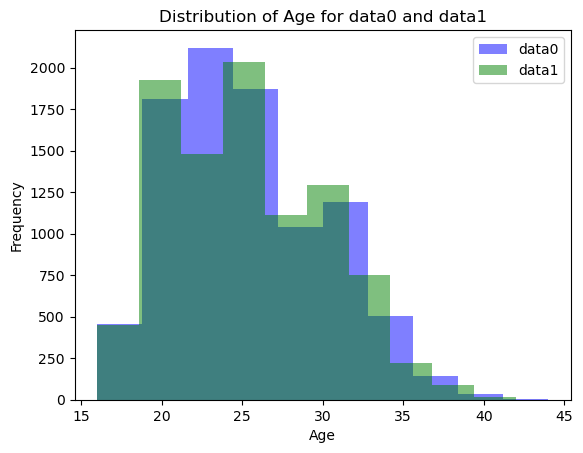

In [28]:
# Write your own code

plt.hist(x=data0['Age'], alpha=0.5, label='data0', color='blue')
plt.hist(x=data1['Age'], alpha=0.5, label='data1', color='green')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age for data0 and data1')
plt.legend()
plt.show()